# Membuat Model Menggunakan tf.data.Datasets

In [1]:
import tensorflow as tf

In [3]:
# membuat objek dataset
mnist = tf.keras.datasets.mnist

# membagi dataset yg sudah ada menjadi dua bagian menggunakan fungsi load_data()
(gambar_latih, label_latih), (gambar_testing, label_testing) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


5


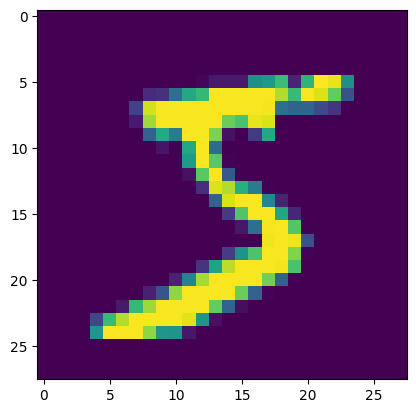

In [4]:
# menampilkan salah satu gambar dari data train untuk memastikan data sesuai dan siap pakai
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(linewidth=200)
plt.imshow(gambar_latih[0])
print(label_latih[0])

namun, dataset yang kita miliki belum dinormalisasi sehingga kita harus melakukannya secara manual. kode dibawah ini berfungis untuk membagi setiap piksel pada gambar sebesar 255 karena nilia sebuah piksel berkisar dari 0 sampai 255

In [5]:
gambar_latih = gambar_latih / 255.0
gambar_testing = gambar_testing / 255.0

Selanjutnya, kita akan menggunakan 3 layer sebagai arsitektur model ini. Untuk layer pertama, kita menggunakan layer khusus yaitu Flatten yang berfungsi untuk mengubah input kita yang berupa matriks 2 dimensi menjadi array 1 dimensi.

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
# menentukan optimizer dan loss untuk model
model.compile(optimizer = tf.optimizers.Adam(),
               loss = 'sparse_categorical_crossentropy',
               metrics=['accuracy'])
model.fit(gambar_latih, label_latih, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8781 - loss: 0.4311
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9626 - loss: 0.1269
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9760 - loss: 0.0832
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9817 - loss: 0.0585
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9863 - loss: 0.0438


# Membuat Model Menggunakan Tensorflow Datasets

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

In [14]:
# load dataset
ds = tfds.load('mnist', split='train', shuffle_files=True)
assert isinstance(ds, tf.data.Dataset)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/mnist/incomplete.XMDS2A_3.0.1/mnist-train.tfrecord*...:   0%|          | 0…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/mnist/incomplete.XMDS2A_3.0.1/mnist-test.tfrecord*...:   0%|          | 0/…

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [15]:
(train_images, train_labels), (test_images, test_labels) = tfds.as_numpy(tfds.load(
    'mnist',
    split = ['train', 'test'],
    batch_size=-1,
    as_supervised=True
))

Selanjutnya, kita akan menggunakan berbagai macam layer sebagai arsitektur model ini. Untuk layer pertama, kita menggunakan layer khusus yaitu Conv2D() yang digunakan untuk mengekstraksi fitur dari gambar input menggunakan operasi konvolusi. Dilanjutkan oleh MaxPooling2D yang berguna untuk mereduksi dimensi spasial dari representasi gambar berdasarkan layer sebelumnya.

Setelah trial and error mengenai layer Convo2D dan MaxPooling2D, barulah kita menggunakan Flatten yang berfungsi untuk mengubah input kita yang berupa matriks 2 dimensi menjadi array 1 dimensi.

In [16]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Seperti yang Anda lihat di atas, kita menggunakan beberapa layer Conv2D dan MaxPooling2D. Hal ini sangat berfungsi untuk melakukan perhitungan konvolusi yang lebih detail terhadap data pelatihan yang kita miliki. Hal yang harus diperhatikan ada pada layer pertama, yaitu input_shape. Yup, kita harus menyesuaikan ukuran gambar yang ada pada dataset dengan model yang kita bangun.

Selanjutnya, kita juga harus menggunakan layer Flatten seperti yang sudah kita bahas berkali-kali sebelumnya. Terakhir, pastikan units yang ditetapkan sesuai dengan jumlah kelas yang ada pada kasus Anda. Karena kasus ini merupakan multi kelas dengan 10 kelas, units yang dibutuhkan adalah 10 dengan activation softmax.

Sebelum melakukan pelatihan, kita harus menentukan tiga buah argumen untuk melakukan compile model yang telah dibangun. Tentunya Anda masih ingatkan terhadap optimizers, loss function, dan metrics? Benar, kita harus menentukan konfigurasi yang tepat untuk kasus yang dihadapi.

In [17]:
# konfigurasi model
model.compile(
    optimizer=tf.keras.optimizers.RMSprop(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [18]:
# melatih model
model.fit(train_images, train_labels, epochs=5, batch_size=50)

Epoch 1/5
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 69s 56ms/step - accuracy: 0.8323 - loss: 0.9859
Epoch 2/5
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 60s 50ms/step - accuracy: 0.9733 - loss: 0.0934
Epoch 3/5
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 79s 47ms/step - accuracy: 0.9807 - loss: 0.0707
Epoch 4/5
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 80s 46ms/step - accuracy: 0.9845 - loss: 0.0576
Epoch 5/5
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 83s 47ms/step - accuracy: 0.9864 - loss: 0.0520


In [20]:
# evaluasi model
model.evaluate(test_images, test_labels, batch_size=1)

10000/10000 ━━━━━━━━━━━━━━━━━━━━ 29s 3ms/step - accuracy: 0.9794 - loss: 0.0822


[0.08538155257701874, 0.9793999791145325]